<a href="https://colab.research.google.com/github/CarolinaOutoffice/desafio_telecomx_2/blob/main/desafio_telecom_x_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Telecom X 2


##Parte 1: Carga y preparacion datos


üìò DICCIONARIO DE DATOS

| Campo             | Descripci√≥n                                                                 |
|-------------------|------------------------------------------------------------------------------|
| customerID        | N√∫mero de identificaci√≥n √∫nico de cada cliente                              |
| Churn             | Si el cliente dej√≥ o no la empresa                                           |
| gender            | G√©nero (masculino o femenino)                                                |
| SeniorCitizen     | Informaci√≥n sobre si un cliente tiene o no una edad igual o mayor a 65 a√±os |
| Partner           | Si el cliente tiene o no una pareja                                          |
| Dependents        | Si el cliente tiene o no dependientes                                        |
| tenure            | Meses de contrato del cliente                                                |
| PhoneService      | Suscripci√≥n al servicio telef√≥nico                                           |
| MultipleLines     | Suscripci√≥n a m√°s de una l√≠nea telef√≥nica                                    |
| InternetService   | Suscripci√≥n a un proveedor de internet                                       |
| OnlineSecurity    | Suscripci√≥n adicional de seguridad en l√≠nea                                  |
| OnlineBackup      | Suscripci√≥n adicional de respaldo en l√≠nea                                   |
| DeviceProtection  | Suscripci√≥n adicional de protecci√≥n del dispositivo                          |
| TechSupport       | Suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera             |
| StreamingTV       | Suscripci√≥n de televisi√≥n por cable                                          |
| StreamingMovies   | Suscripci√≥n de streaming de pel√≠culas                                        |
| Contract          | Tipo de contrato                                                             |
| PaperlessBilling  | Si el cliente prefiere recibir la factura en l√≠nea                           |
| PaymentMethod     | Forma de pago                                                                |
| Charges.Monthly   | Total de todos los servicios del cliente por mes                             |
| Charges.Total     | Total gastado por el cliente                                                 |


In [1]:
import pandas as pd


In [2]:
# Leer el archivo CSV en un DataFrame de pandas
try:
    df = pd.read_csv('/content/telecomx_data_processed.csv',sep=',')
    print("Archivo le√≠do exitosamente:")
    display(df.head())
except FileNotFoundError:
    print(f"Error: El archivo no se encontr√≥ en la ruta especificada: {file_path}")
except Exception as e:
    print(f"Ocurri√≥ un error al leer el archivo: {e}")


Archivo le√≠do exitosamente:


customerID Churn customer.gender  customer.SeniorCitizen  customer.Partner  \
0  0002-ORFBO    No          Female                   False              True   
1  0003-MKNFE    No            Male                   False             False   
2  0004-TLHLJ   Yes            Male                   False             False   
3  0011-IGKFF   Yes            Male                    True              True   
4  0013-EXCHZ   Yes          Female                    True              True   

   customer.Dependents  customer.tenure  phone.PhoneService  \
0                 True                9                True   
1                False                9                True   
2                False                4                True   
3                False               13                True   
4                False                3                True   

  phone.MultipleLines internet.InternetService  ... internet.DeviceProtection  \
0                  No                      DSL  ...                        No   
1                 Yes                      DSL  ...                        No   
2                  No              Fiber optic  ...                       Yes   
3                  No              Fiber optic  ...                       Yes   
4                  No              Fiber optic  ...                        No   

  internet.TechSupport internet.StreamingTV internet.StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account.Contract account.PaperlessBilling account.PaymentMethod  \
0         One year                     True          Mailed check   
1   Month-to-month                    False          Mailed check   
2   Month-to-month                     True      Electronic check   
3   Month-to-month                     True      Electronic check   
4   Month-to-month                     True          Mailed check   

   account.Charges.Monthly account.Charges.Total  Cuentas_Diarias  
0                     65.6                593.30         2.186667  
1                     59.9                542.40         1.996667  
2                     73.9                280.85         2.463333  
3                     98.0               1237.85         3.266667  
4                     83.9                267.40         2.796667  

[5 rows x 22 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   bool   
 5   customer.Dependents        7267 non-null   bool   
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   bool   
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## Tratamiento de los datos


In [4]:
df_limpio=df.drop(columns=['customerID'])

In [5]:
# Modificaci√≥n y revision columna churn
df_limpio.loc[df['Churn'].str.strip() == 'NC', 'Churn'] = 'No'
df_limpio['Churn'] = df_limpio['Churn'].replace({'No':0,'Yes':1})
df_limpio['Churn']=df_limpio['Churn'].astype('int')

# Ver cu√°ntos clientes han hecho churn
print(df_limpio["Churn"].value_counts())

# Tambi√©n en porcentaje
print(df_limpio["Churn"].value_counts(normalize=True))


Churn
0    5398
1    1869
Name: count, dtype: int64
Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64


/tmp/ipython-input-4223662881.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_limpio['Churn'] = df_limpio['Churn'].replace({'No':0,'Yes':1})


In [6]:
df_limpio.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [7]:
cols_to_fix_internet = [ 'internet.OnlineSecurity', 'internet.OnlineBackup','internet.DeviceProtection', 'internet.TechSupport','internet.StreamingTV', 'internet.StreamingMovies']

for col in cols_to_fix_internet:
   df_limpio[col]=df_limpio[col].replace('No internet service', 'No')

In [8]:
df_limpio.info()

for col in df_limpio.columns:
  print(col,df_limpio[col].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7267 non-null   int64  
 1   customer.gender            7267 non-null   object 
 2   customer.SeniorCitizen     7267 non-null   bool   
 3   customer.Partner           7267 non-null   bool   
 4   customer.Dependents        7267 non-null   bool   
 5   customer.tenure            7267 non-null   int64  
 6   phone.PhoneService         7267 non-null   bool   
 7   phone.MultipleLines        7267 non-null   object 
 8   internet.InternetService   7267 non-null   object 
 9   internet.OnlineSecurity    7267 non-null   object 
 10  internet.OnlineBackup      7267 non-null   object 
 11  internet.DeviceProtection  7267 non-null   object 
 12  internet.TechSupport       7267 non-null   object 
 13  internet.StreamingTV       7267 non-null   objec

In [9]:
columnas_categoricas=df_limpio.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['customer.gender', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaymentMethod'],
      dtype='object')

In [10]:
df_encoded=pd.get_dummies(df_limpio, columns=columnas_categoricas,drop_first=True)

In [11]:
df_encoded.head()

Churn  customer.SeniorCitizen  customer.Partner  customer.Dependents  \
0      0                   False              True                 True   
1      0                   False             False                False   
2      1                   False             False                False   
3      1                    True              True                False   
4      1                    True              True                False   

   customer.tenure  phone.PhoneService  account.PaperlessBilling  \
0                9                True                      True   
1                9                True                     False   
2                4                True                      True   
3               13                True                      True   
4                3                True                      True   

   account.Charges.Monthly  account.Charges.Total  Cuentas_Diarias  ...  \
0                     65.6                 593.30         2.186667  ...   
1                     59.9                 542.40         1.996667  ...   
2                     73.9                 280.85         2.463333  ...   
3                     98.0                1237.85         3.266667  ...   
4                     83.9                 267.40         2.796667  ...   

   internet.OnlineBackup_Yes  internet.DeviceProtection_Yes  \
0                       True                          False   
1                      False                          False   
2                      False                           True   
3                       True                           True   
4                      False                          False   

   internet.TechSupport_Yes  internet.StreamingTV_Yes  \
0                      True                      True   
1                     False                     False   
2                     False                     False   
3                     False                      True   
4                      True                      True   

   internet.StreamingMovies_Yes  account.Contract_One year  \
0                         False                       True   
1                          True                      False   
2                         False                      False   
3                          True                      False   
4                         False                      False   

   account.Contract_Two year  account.PaymentMethod_Credit card (automatic)  \
0                      False                                          False   
1                      False                                          False   
2                      False                                          False   
3                      False                                          False   
4                      False                                          False   

   account.PaymentMethod_Electronic check  account.PaymentMethod_Mailed check  
0                                   False                                True  
1                                   False                                True  
2                                    True                               False  
3                                    True                               False  
4                                   False                                True  

[5 rows x 26 columns]

In [12]:
# Ver cu√°ntos clientes han hecho churn
print(df_limpio["Churn"].value_counts())

# Tambi√©n en porcentaje
print(df_limpio["Churn"].value_counts(normalize=True))


Churn
0    5398
1    1869
Name: count, dtype: int64
Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64


In [13]:
df_encoded.isnull().sum()

Churn                                            0
customer.SeniorCitizen                           0
customer.Partner                                 0
customer.Dependents                              0
customer.tenure                                  0
phone.PhoneService                               0
account.PaperlessBilling                         0
account.Charges.Monthly                          0
account.Charges.Total                            0
Cuentas_Diarias                                  0
customer.gender_Male                             0
phone.MultipleLines_No phone service             0
phone.MultipleLines_Yes                          0
internet.InternetService_Fiber optic             0
internet.InternetService_No                      0
internet.OnlineSecurity_Yes                      0
internet.OnlineBackup_Yes                        0
internet.DeviceProtection_Yes                    0
internet.TechSupport_Yes                         0
internet.StreamingTV_Yes                         0
internet.StreamingMovies_Yes                     0
account.Contract_One year                        0
account.Contract_Two year                        0
account.PaymentMethod_Credit card (automatic)    0
account.PaymentMethod_Electronic check           0
account.PaymentMethod_Mailed check               0
dtype: int64

## Correlaci√≥n entre variables

In [14]:
corr=df_encoded.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

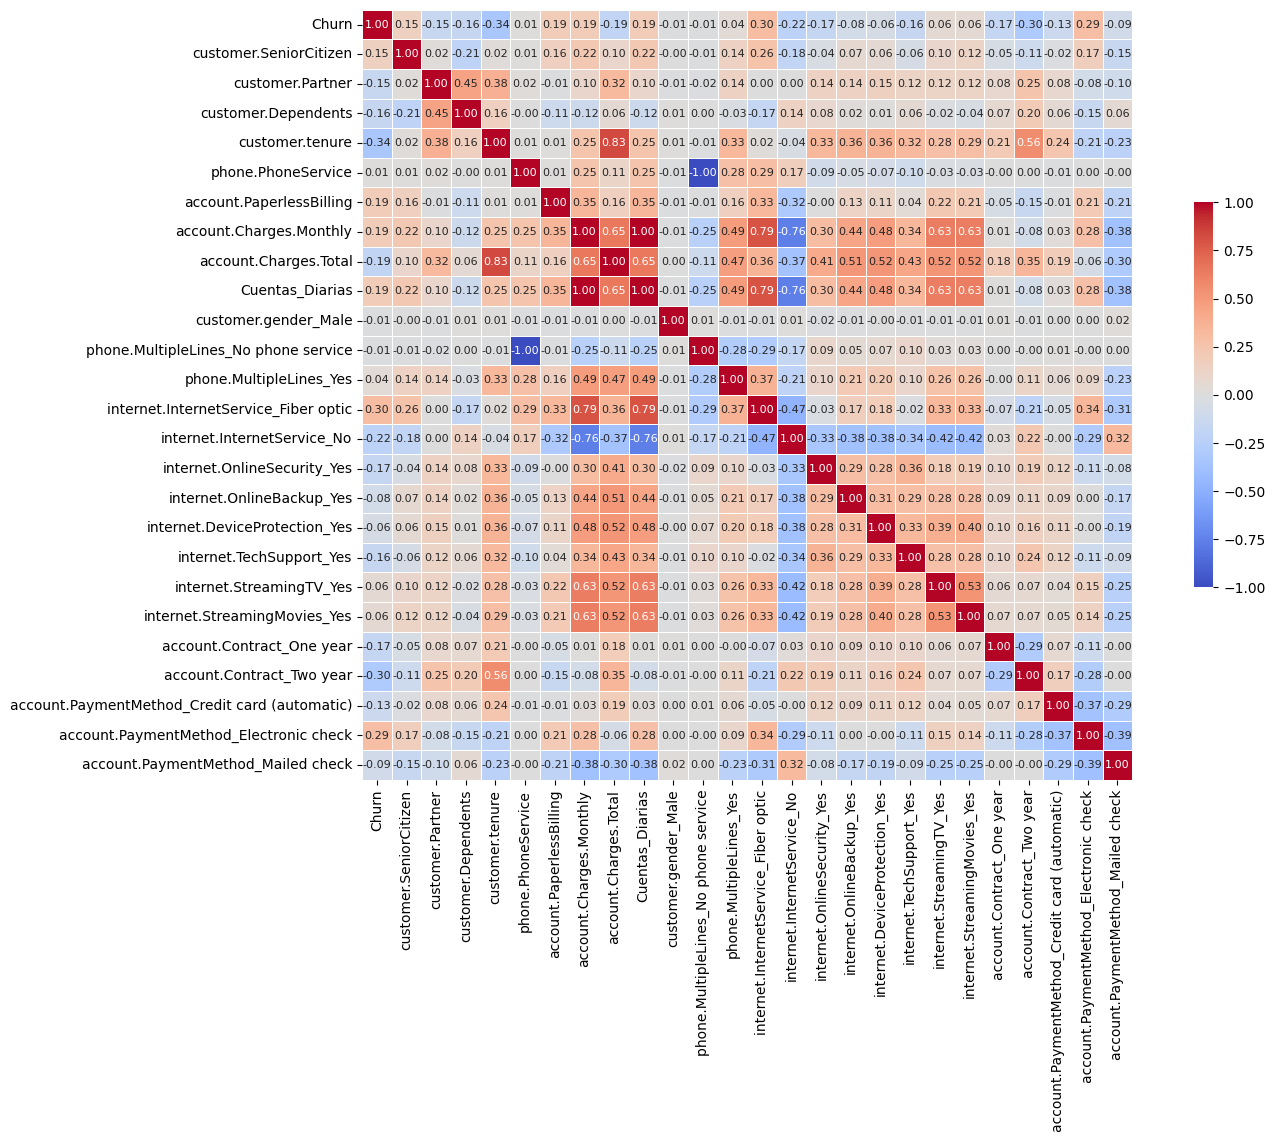

In [15]:
#mapa de correlaci√≥n con numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(corr.round(2), vmax=1, vmin=-1, center=0, square= True, linewidths=.5, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8},
                 cbar_kws={"shrink":.5})
plt.show

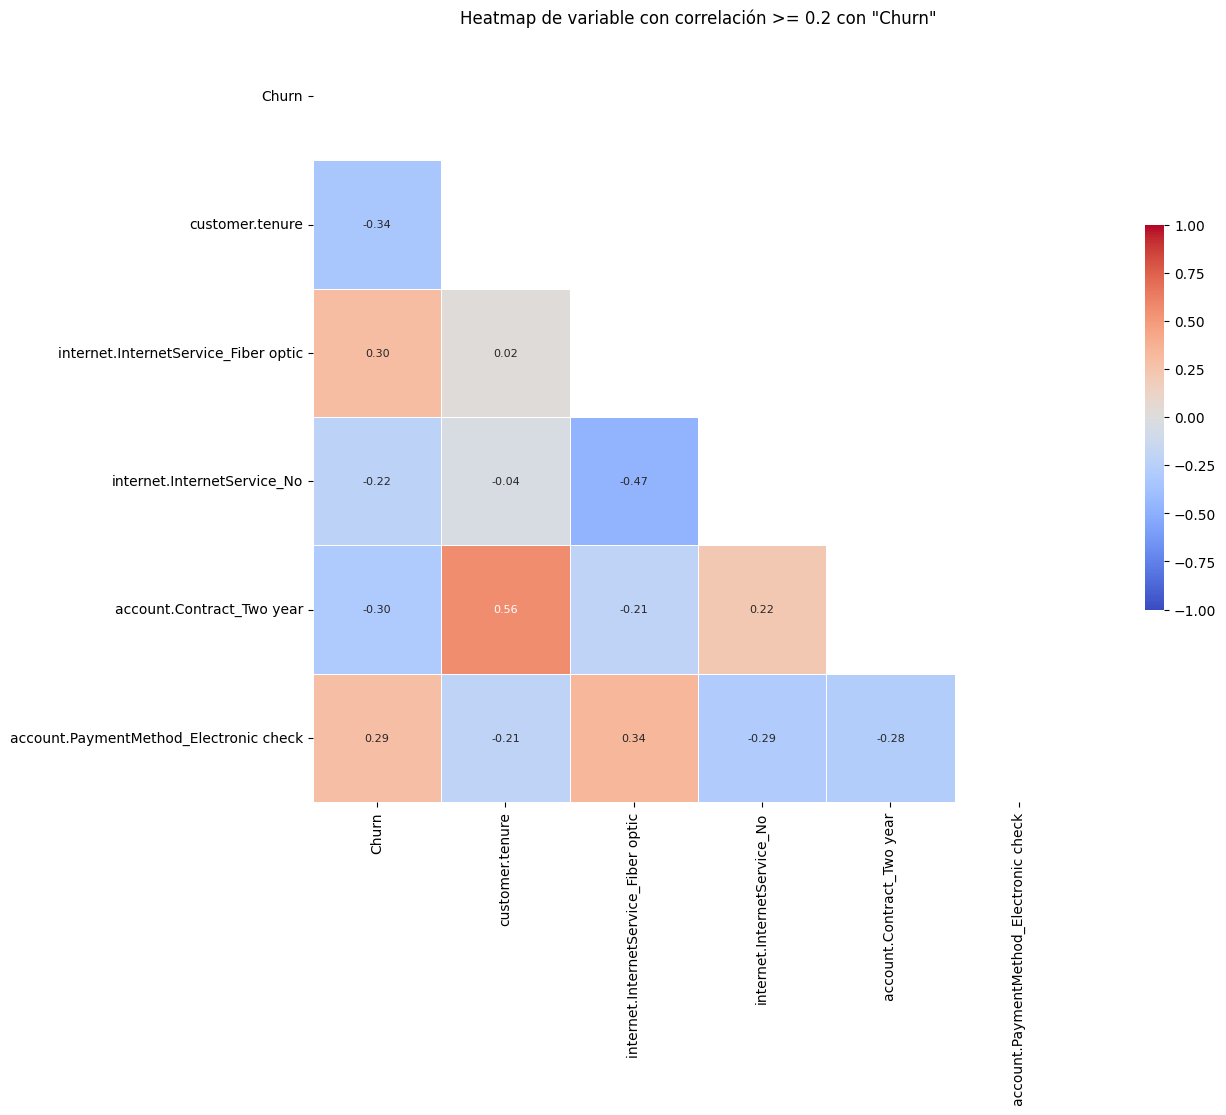

In [16]:
# mascara para mapa de calor

target_var='Churn'

#Definir minimo de correlaci√≥n absoluta para la selecci√≥n
limpiar=0.2

#filtrar variables que sean mayor o igual a la correlaci√≥n absoluta, esto crear√° una lista con las variables relevantes.
variables_relevantes=corr.index[abs(corr[target_var])>= limpiar].tolist()

if target_var not in variables_relevantes:
  variables_relevantes.append(target_var)

#crear una matriz de correlaci√≥n solo con las variables relevantes
corr_relevantes=corr.loc[variables_relevantes,variables_relevantes]

# Generar una mascara para esconder o triangulo superior de la matriz
mascara = np.triu(np.ones_like(corr_relevantes, dtype=bool))

#crear mapa de calor
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(corr_relevantes.round(2),
                 vmax=1,
                 vmin=-1,
                 center=0,
                 square= True,
                 linewidths=.5,
                 annot=True,
                 fmt='.2f',
                 cmap='coolwarm',
                 annot_kws={"size": 8},
                 cbar_kws={"shrink":.5},
                 mask=mascara)
plt.title(f'Heatmap de variable con correlaci√≥n >= {limpiar} con "{target_var}"')
plt.show()


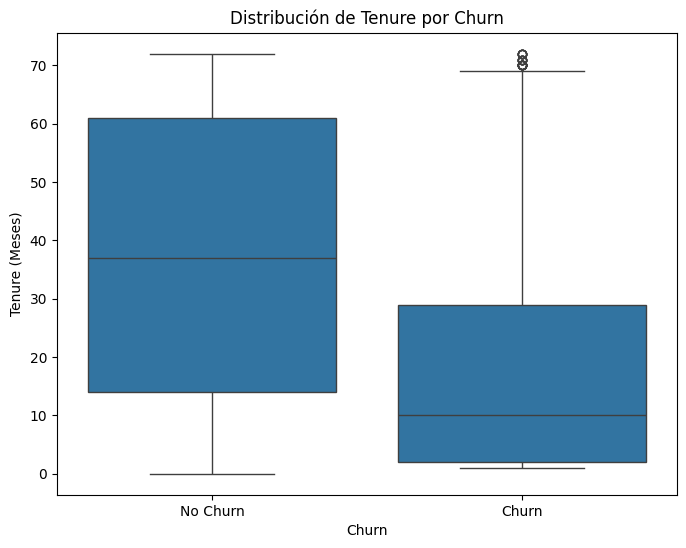

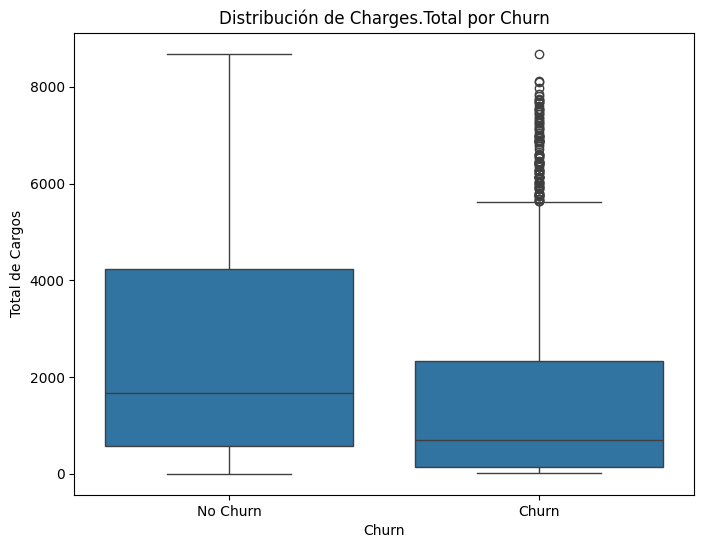

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for customer.tenure vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df_limpio)
plt.title('Distribuci√≥n de Tenure por Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Meses)')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

# Boxplot for account.Charges.Total vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_limpio)
plt.title('Distribuci√≥n de Charges.Total por Churn')
plt.xlabel('Churn')
plt.ylabel('Total de Cargos')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

## Analisis Multicolinealidad

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [19]:
# PASO 1: Preparar tus datos
X = df_encoded.drop(columns=['Churn'])

y = df_encoded['Churn']


# PASO 2: PRIMERO dividir, DESPU√âS escalar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:
# PASO 3: Crear y ajustar el scaler SOLO con datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)  # El scaler aprende SOLO de training


StandardScaler()

In [21]:
# PASO 4: Aplicar la transformaci√≥n a ambos conjuntos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:

# PASO 4.1: AN√ÅLISIS VIF - Detectar multicolinealidad
def calculate_vif(X_scaled, feature_names):
    """
    Calcula el VIF para cada variable
    VIF > 10: Multicolinealidad alta
    VIF > 5: Multicolinealidad moderada
    """
    vif_data = pd.DataFrame()
    vif_data["Variable"] = feature_names
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i)
                       for i in range(X_scaled.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

# Calcular VIF con datos de entrenamiento escalados
feature_names = X.columns.tolist()  # Asume que X es un DataFrame
vif_results = calculate_vif(X_train_scaled, feature_names)
print("=== AN√ÅLISIS DE MULTICOLINEALIDAD (VIF) ===")
print(vif_results)
print("\nInterpretaci√≥n:")
print("VIF < 5: Sin problemas de multicolinealidad")
print("VIF 5-10: Multicolinealidad moderada")
print("VIF > 10: Multicolinealidad alta - considerar eliminar variable")

# Identificar variables problem√°ticas
high_vif = vif_results[vif_results['VIF'] > 10]
if not high_vif.empty:
    print(f"\n‚ö†Ô∏è  Variables con VIF > 10:")
    for idx, row in high_vif.iterrows():
        print(f"  - {row['Variable']}: VIF = {row['VIF']:.2f}")
    print("\nConsideraci√≥n: Podr√≠as eliminar estas variables para reducir multicolinealidad")
else:
    print("\n‚úÖ No se detect√≥ multicolinealidad alta (VIF > 10)")
#

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


=== AN√ÅLISIS DE MULTICOLINEALIDAD (VIF) ===
                                         Variable         VIF
4                              phone.PhoneService         inf
8                                 Cuentas_Diarias         inf
6                         account.Charges.Monthly         inf
10           phone.MultipleLines_No phone service         inf
12           internet.InternetService_Fiber optic  147.864560
13                    internet.InternetService_No  103.585092
19                   internet.StreamingMovies_Yes   24.153905
18                       internet.StreamingTV_Yes   23.847902
7                           account.Charges.Total   10.739552
3                                 customer.tenure    7.537547
11                        phone.MultipleLines_Yes    7.203416
16                  internet.DeviceProtection_Yes    6.878082
15                      internet.OnlineBackup_Yes    6.673730
17                       internet.TechSupport_Yes    6.416880
14                    int

In [23]:
# PASO 4.2: (Opcional) Eliminar variables con VIF muy alto
# comentar si no quieres eliminar autom√°ticamente variables problem√°ticas

if not high_vif.empty:
    # Eliminar la variable con VIF m√°s alto iterativamente
    variables_to_remove = high_vif['Variable'].tolist()
    print(f"\nEliminando variables con VIF alto: {variables_to_remove}")

    # Obtener √≠ndices de columnas a mantener
    cols_to_keep = [i for i, col in enumerate(feature_names)
                   if col not in variables_to_remove]

    X_train_scaled = X_train_scaled[:, cols_to_keep]
    X_test_scaled = X_test_scaled[:, cols_to_keep]
    feature_names = [feature_names[i] for i in cols_to_keep]

    # Recalcular VIF despu√©s de eliminar variables
    vif_results_new = calculate_vif(X_train_scaled, feature_names)
    print("=== VIF DESPU√âS DE ELIMINAR VARIABLES ===")
    print(vif_results_new)




Eliminando variables con VIF alto: ['phone.PhoneService', 'Cuentas_Diarias', 'account.Charges.Monthly', 'phone.MultipleLines_No phone service', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.StreamingMovies_Yes', 'internet.StreamingTV_Yes', 'account.Charges.Total']
=== VIF DESPU√âS DE ELIMINAR VARIABLES ===
                                         Variable       VIF
3                                 customer.tenure  2.741327
12                      account.Contract_Two year  2.318038
14         account.PaymentMethod_Electronic check  1.910489
15             account.PaymentMethod_Mailed check  1.799267
13  account.PaymentMethod_Credit card (automatic)  1.563816
11                      account.Contract_One year  1.518595
1                                customer.Partner  1.463155
2                             customer.Dependents  1.380372
10                       internet.TechSupport_Yes  1.295156
9                   internet.DeviceProtection_Yes  1.286

##Balanceo

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from collections import Counter

In [25]:

# PASO 4.3: BALANCEAR CLASES (despu√©s de VIF y posible eliminaci√≥n de variables)
print("\n=== BALANCEO DE CLASES ===")
print(f"Antes del balanceo: {Counter(y_train)}")

# Opci√≥n 1: SMOTE (Oversampling sint√©tico) - RECOMENDADO
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"Despu√©s del balanceo: {Counter(y_train_balanced)}")
print(f"Nuevas proporciones: {np.unique(y_train_balanced, return_counts=True)}")


=== BALANCEO DE CLASES ===
Antes del balanceo: Counter({0: 4316, 1: 1497})
Despu√©s del balanceo: Counter({0: 4316, 1: 4316})
Nuevas proporciones: (array([0, 1]), array([4316, 4316]))


## Entrenar modelo con datos escalados y balanceados

### LogisticRegresion

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression



In [27]:
# PASO 5: Entrenar el modelo con datos escalados
model_lr = LogisticRegression()
model_lr.fit(X_train_balanced, y_train_balanced)

# PASO 6: Hacer predicciones con datos escalados

y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_proba_lr = model_lr.predict_proba(X_test_scaled)[:, 1]

# PASO 7: Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Precisi√≥n: {accuracy:.3f}")

# IMPORTANTE: Guardar el scaler para datos nuevos
# Para predecir datos nuevos en el futuro:
# nuevos_datos_scaled = scaler.transform(nuevos_datos)
# prediccion = model.predict(nuevos_datos_scaled)

Precisi√≥n: 0.720


In [28]:
# PASO 7: Evaluar el modelo (m√©tricas apropiadas para datos desbalanceados)
print("\n=== EVALUACI√ìN DEL MODELO REGRESION LINEAL ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print("\nReporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred_lr, target_names=['No Churn', 'Churn']))
print("\nMatriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_lr))


=== EVALUACI√ìN DEL MODELO REGRESION LINEAL ===
Accuracy: 0.720

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

    No Churn       0.91      0.69      0.79      1082
       Churn       0.47      0.80      0.59       372

    accuracy                           0.72      1454
   macro avg       0.69      0.75      0.69      1454
weighted avg       0.80      0.72      0.74      1454


Matriz de confusi√≥n:
[[750 332]
 [ 75 297]]
ROC AUC: 0.8304153499095661


In [29]:
# Mostrar los coeficientes de la Regresi√≥n Log√≠stica
print("\n=== COEFICIENTES DE LA REGRESI√ìN LOG√çSTICA ===")

coefficients = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': model_lr.coef_[0]
}).sort_values('Coeficiente', ascending=False)

print(coefficients)


=== COEFICIENTES DE LA REGRESI√ìN LOG√çSTICA ===
                                         Variable  Coeficiente
4                        account.PaperlessBilling     0.297112
6                         phone.MultipleLines_Yes     0.291602
14         account.PaymentMethod_Electronic check     0.214398
9                   internet.DeviceProtection_Yes     0.158407
0                          customer.SeniorCitizen     0.131479
8                       internet.OnlineBackup_Yes     0.006716
1                                customer.Partner    -0.040951
5                            customer.gender_Male    -0.045566
13  account.PaymentMethod_Credit card (automatic)    -0.052623
7                     internet.OnlineSecurity_Yes    -0.109699
10                       internet.TechSupport_Yes    -0.114976
15             account.PaymentMethod_Mailed check    -0.130692
2                             customer.Dependents    -0.152460
11                      account.Contract_One year    -0.357719
3    

###Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# PASO 5: Entrenar el modelo con datos escalados
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
model_rf.fit(X_train_balanced, y_train_balanced)

# Predicciones con Random Forest
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_proba_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

print("--- EVALUACION MODELO RANDOM FOREST ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print("\nReporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))


--- EVALUACION MODELO RANDOM FOREST ---
Accuracy: 0.733

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

    No Churn       0.88      0.75      0.81      1082
       Churn       0.49      0.70      0.57       372

    accuracy                           0.73      1454
   macro avg       0.68      0.72      0.69      1454
weighted avg       0.78      0.73      0.75      1454



In [31]:
# COMPARACI√ìN DE MODELOS
print("\n=== COMPARACI√ìN DE MODELOS ===")
print(f"Accuracy Log√≠stica: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"Accuracy Random Forest: {accuracy_score(y_test, y_pred_rf):.3f}")

# Importancia de caracter√≠sticas (solo Random Forest)
print("\n=== IMPORTANCIA DE CARACTER√çSTICAS (Random Forest) ===")
feature_importance = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': model_rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print(feature_importance.head(10))  # Top 10 variables m√°s importantes

# IMPORTANTE: Guardar el scaler para datos nuevos
# Para predecir datos nuevos en el futuro:
# nuevos_datos_scaled = scaler.transform(nuevos_datos)
# prediccion = model.predict(nuevos_datos_scaled)


=== COMPARACI√ìN DE MODELOS ===
Accuracy Log√≠stica: 0.720
Accuracy Random Forest: 0.733

=== IMPORTANCIA DE CARACTER√çSTICAS (Random Forest) ===
                                  Variable  Importancia
3                          customer.tenure     0.230772
12               account.Contract_Two year     0.197212
11               account.Contract_One year     0.101053
14  account.PaymentMethod_Electronic check     0.089724
4                 account.PaperlessBilling     0.065500
10                internet.TechSupport_Yes     0.050283
6                  phone.MultipleLines_Yes     0.039924
1                         customer.Partner     0.039206
7              internet.OnlineSecurity_Yes     0.038080
2                      customer.Dependents     0.031030


In [32]:
print("\nMatriz de confusi√≥n (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nComparaci√≥n de Matrices de Confusi√≥n:")
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nRandom Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Matriz de confusi√≥n (Random Forest):
[[807 275]
 [113 259]]

Comparaci√≥n de Matrices de Confusi√≥n:
Logistic Regression:
[[750 332]
 [ 75 297]]

Random Forest:
[[807 275]
 [113 259]]


###Guardando el modelo

In [33]:
import pickle

# 1. Guardar el modelo Random Forest
with open("modelo_random_forest.pkl", "wb") as f:
    pickle.dump(model_rf, f, protocol=pickle.HIGHEST_PROTOCOL)

# 2. Guardar el scaler (si usaste estandarizaci√≥n/minmax/etc.)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f, protocol=pickle.HIGHEST_PROTOCOL)


## Informe

#  Informe  - An√°lisis de Cancelaci√≥n de Clientes en **Telecom X**

## 1. Desempe√±o de los modelos de predicci√≥n
Se evaluaron dos enfoques principales para predecir la cancelaci√≥n de clientes (*churn*):  

- **Regresi√≥n Log√≠stica**  
  - Accuracy: **72%**  
  - ROC AUC: **0.83**  
  - Buen rendimiento, con capacidad destacada para identificar clientes que efectivamente cancelan.  

- **Random Forest**  
  - Accuracy: **73.3%**  
  - Ligera mejora respecto a la Regresi√≥n Log√≠stica.  
  - Ofrece mayor interpretabilidad en t√©rminos de **importancia de variables**.  

 Ambos modelos son consistentes en sus conclusiones. Random Forest muestra una ventaja marginal en precisi√≥n y resulta m√°s adecuado para interpretar factores clave de cancelaci√≥n.

---

## 2. Principales factores asociados al churn

### Factores que **incrementan la probabilidad de cancelaci√≥n**
- **M√©todo de pago: Electronic Check** ‚Üí los clientes que utilizan este m√©todo presentan mayor propensi√≥n al churn, posiblemente debido a menor fidelizaci√≥n con la compa√±√≠a.  
- **Facturaci√≥n electr√≥nica (Paperless Billing)** ‚Üí los clientes digitales tienden a ser m√°s sensibles a comparar alternativas y cambiar de proveedor.  
- **M√∫ltiples l√≠neas telef√≥nicas** ‚Üí mayor riesgo de cancelaci√≥n, probablemente asociado a costos m√°s altos y b√∫squeda de alternativas m√°s econ√≥micas.  

### Factores que **reducen la probabilidad de cancelaci√≥n**
- **Antig√ºedad del cliente (Tenure)** ‚Üí es el factor con mayor peso; a mayor tiempo de permanencia, menor propensi√≥n al churn.  
- **Contratos de largo plazo (1 y 2 a√±os)** ‚Üí los contratos, en especial los de 2 a√±os, act√∫an como un fuerte mecanismo de retenci√≥n.  
- **Clientes con dependientes** ‚Üí presentan menor riesgo de cancelaci√≥n, lo que sugiere mayor estabilidad y necesidad de continuidad en el servicio.  

---

## 3. Estrategias de retenci√≥n recomendadas

1. **Fidelizaci√≥n por antig√ºedad**  
   - Implementar beneficios progresivos en funci√≥n de los a√±os de permanencia (descuentos, upgrades de servicio o acceso a planes exclusivos).  

2. **Incentivar contratos de largo plazo**  
   - Promover activamente la migraci√≥n de contratos mensuales a planes de 1 o 2 a√±os, con descuentos iniciales o beneficios adicionales.  

3. **Optimizar la experiencia de pago**  
   - Reducir la fricci√≥n de clientes que utilizan *Electronic Check*, incentivando medios m√°s estables como d√©bito autom√°tico o tarjeta de cr√©dito, ofreciendo beneficios al cambiar de m√©todo.  

4. **Segmentaci√≥n de clientes digitales**  
   - Los usuarios con facturaci√≥n electr√≥nica deben ser objeto de campa√±as personalizadas, con ofertas competitivas y comunicaci√≥n proactiva para reducir la sensibilidad al cambio.  

5. **Planes para clientes con m√∫ltiples l√≠neas**  
   - Dise√±ar paquetes familiares o corporativos con descuentos escalonados, que reduzcan el incentivo de migrar hacia la competencia.  

---

## 4. Conclusiones
El an√°lisis confirma que:  
- **La antig√ºedad y los contratos largos son los factores m√°s efectivos de retenci√≥n**.  
- **Los clientes digitales y con m√©todos de pago espec√≠ficos (Electronic Check) representan segmentos vulnerables** que requieren atenci√≥n diferenciada.  

La implementaci√≥n de estrategias dirigidas a estos perfiles permitir√° a **Telecom X** **disminuir significativamente la tasa de cancelaci√≥n**, fortaleciendo la lealtad y maximizando el valor de vida del cliente
